# Test 2b - Merge, Aggregate, Visualize

## Introduction

This problem tests your ability to merge, aggregate, and visualize data.
You'll work with realistic business data to answer questions about product profitability.

Before submitting, ensure your notebook:

- Includes your verification info (Banner ID and code) as the first cell
- Runs completely with "Kernel → Restart & Run All"
- Shows your work (don't just print final answers)
- Includes your interpretation responses at the end

## Dataset: Bean & Brew Coffee Shop

You've been hired to analyze sales data for Bean & Brew, a local coffee shop chain with three locations. The owner wants to understand which products are most profitable and how profitability varies across locations.

There are two data files:

- `sales.csv` - Individual transaction records
  - `transaction_id`: Unique transaction identifier
  - `timestamp`: Date and time of purchase (format: 'YYYY-MM-DD HH:MM:SS')
  - `location`: Store location ('Downtown', 'Campus', 'Suburb')
  - `product_id`: Product identifier (links to products table)
  - `quantity`: Number of units sold
  - `revenue`: Total revenue from transaction
  - `payment_method`: Payment type ('Cash', 'Credit', 'Mobile')
  - `loyalty_member`: Boolean indicating if customer is loyalty program member
- `products.csv` - Product catalog
  - `product_id`: Unique product identifier
  - `name`: Product name
  - `category`: Product category ('Coffee', 'Tea', 'Pastry', 'Sandwich')
  - `cost`: Cost to make/acquire one unit (for profit calculation)

The dataset contains two weeks of sales data (approximately 3,000 transactions) across 18 products. It includes both regular and premium items in each category.

We are interested in learning which product categories generate the most profit, and how does profitability vary across locations? Complete the following tasks to answer those questions and more.

## Scoring

Total: 30 points (+ 5 bonus)

- Tasks 1-6: 18 points
- Interpretation (Questions 1-4): 12 points
- Bonus: 5 points (optional)

## Generate Your Dataset

Before starting the analysis, you need to generate your unique dataset using your Banner ID.

1. Open a terminal in the folder containing `generate_test2b_data.py`
2. Activate your conda virtual environment
3. Run: `python generate_test2b_data.py`
4. Enter your 9-digit Banner ID when prompted (you'll enter it twice to confirm)

The script will create two files in the `data/` folder:

- `data/products.csv` - Product catalog
- `data/sales.csv` - Transaction records

Important: At the end, the script displays a verification block like this:

```
======================================================================
DATA VERIFICATION INFORMATION
======================================================================
banner id:          904123456
verification code:  5e0dXXXXXXXX
======================================================================
```

Copy the banner id and verification code lines and paste them into the cell below. This is required for submission.

#### Banner ID and Verification Code

banner id:          904120216
verification code:  e2f01e6ec8e4


## Setup: Load the Data

Run the cell below to load the data. The code is provided for you.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data (provided)
sales = pd.read_csv('data/sales.csv', parse_dates=['timestamp'])
products = pd.read_csv('data/products.csv')

print(f"Sales: {len(sales)} transactions")
print(f"Products: {len(products)} items in catalog")
print()
print("Sales preview:")
sales.head()

Sales: 2744 transactions
Products: 18 items in catalog

Sales preview:


,transaction_id,timestamp,location,product_id,quantity,revenue,payment_method,loyalty_member
0,1002,2025-11-17 06:04:00,Campus,101,1.0,2.51,Credit,False
1,1000,2025-11-17 06:13:00,Downtown,114,1.0,5.92,Mobile,True
2,1003,2025-11-17 06:22:00,Downtown,103,1.0,5.49,Mobile,False
3,1001,2025-11-17 06:42:00,Campus,111,1.0,3.38,Cash,False
4,1012,2025-11-17 07:05:00,Campus,112,1.0,3.01,Mobile,False


In [5]:
# Products catalog
products

,product_id,name,category,cost
0,101,Espresso,Coffee,1.2
1,102,Cappuccino,Coffee,1.8
2,103,Latte,Coffee,1.9
3,104,Americano,Coffee,1.0
4,105,Cold Brew,Coffee,1.5
5,106,Nitro Cold Brew,Coffee,2.5
6,107,Green Tea,Tea,0.8
7,108,Chai Latte,Tea,1.2
8,109,Herbal Tea,Tea,0.7
9,110,Premium Matcha,Tea,2.2


## Task 1: Data Quality Check

Investigate the sales data quality and coverage. Your code should answer the following questions:

1. How many missing values are in each column?
2. How many unique product IDs appear in the sales data? Compare this to the catalog size.
3. What is the date range (earliest and latest transaction)?

### Your Code

In [9]:
# Task 1: use isna(), nunique(), min/max on timestamp
missing_valuecount = sales.isna().sum()
print("Number of Missing Values in each Column:")
print(missing_valuecount)
print()
print()
unique_ids = sales['product_id'].nunique()
print(f"There are {unique_ids} unique product IDs in the sales data compared to the only 18 catalog items")
earliest_date = sales['timestamp'].min()
latest_date = sales['timestamp'].max()
print()
print(f"Date Range: {earliest_date} - {latest_date}")

Number of Missing Values in each Column:
transaction_id    0
timestamp         0
location          0
product_id        0
quantity          6
revenue           5
payment_method    0
loyalty_member    0
dtype: int64


There are 21 unique product IDs in the sales data compared to the only 18 catalog items

Date Range: 2025-11-17 06:04:00 - 2025-11-30 21:29:00


## Task 2: Merge Sales with Products

Merge the sales and products DataFrames to add product information (name, category, cost) to each transaction.

### Your Code

In [11]:
# Task 2: use pd.merge() with appropriate join type

merged_data = sales.merge(products, on= "product_id", how= "left")
print("Merged Data")
merged_data.head()

Merged Data


,transaction_id,timestamp,location,product_id,quantity,revenue,payment_method,loyalty_member,name,category,cost
0,1002,2025-11-17 06:04:00,Campus,101,1.0,2.51,Credit,False,Espresso,Coffee,1.2
1,1000,2025-11-17 06:13:00,Downtown,114,1.0,5.92,Mobile,True,Cinnamon Roll,Pastry,1.4
2,1003,2025-11-17 06:22:00,Downtown,103,1.0,5.49,Mobile,False,Latte,Coffee,1.9
3,1001,2025-11-17 06:42:00,Campus,111,1.0,3.38,Cash,False,Croissant,Pastry,1.0
4,1012,2025-11-17 07:05:00,Campus,112,1.0,3.01,Mobile,False,Muffin,Pastry,0.9


## Task 3: Verify the Merge

After merging, verify that the merge worked correctly:

1. Compare the shape of the merged DataFrame to the original sales data
2. Check if any rows have missing values in the product columns (name, category, cost)
3. If there are missing values, identify which product_id(s) are causing the problem

### Your Code

In [19]:
# Task 3: check shape, isna() on product columns, filter to find problem IDs
sales_shape = sales.shape
merged_shape = merged_data.shape
print(f"Old Shape: {sales_shape} vs. New Shape: {merged_shape}")
print()
print()
missing_vals = merged_data[['name', 'category', 'cost']].isna().sum()
print(f"Missing Values: {missing_vals}")

missing_mask = merged_data[['name', 'category', 'cost']].isna().any(axis = 1)
problem_rows = merged_data[missing_mask]
problem_ids = problem_rows['product_id']
print(f'Prduct ids causing missing values: {problem_ids}')

Old Shape: (2744, 8) vs. New Shape: (2744, 11)


Missing Values: name        10
category    10
cost        10
dtype: int64
Prduct ids causing missing values: 5       201
409     201
474     200
559     200
1056    201
1507    199
1805    200
1878    199
2506    200
2677    199
Name: product_id, dtype: int64


## Task 4: Profit by Category

First, calculate profit for each transaction: `profit = revenue - (cost × quantity)`

Then summarize profitability by product category. Your code should return a table that shows both total profit and number of transactions for each category. Sort it by total profit (highest first).

### Your Code

In [25]:
# Task 4: create profit column, then groupby with .agg()
merged_data['profit'] = merged_data['revenue'] - (merged_data['cost'] * merged_data['quantity'])
merged_data['profit'].head()

category_data = merged_data.groupby('category').agg(total_profit=('profit', 'sum'), transactions=('transaction_id', 'count'))
sorted_data = category_data.sort_values(by= 'total_profit', ascending= False)
print(sorted_data)

          total_profit  transactions
category                            
Sandwich       4741.50           649
Coffee         2342.67           975
Pastry         1506.81           518
Tea             882.75           592


## Task 5: Profit by Category and Location

Analyze how profitability varies by both category and location. Your code should produce a table that shows the following for every combination of category and location:

- Total profit
- Average profit per transaction
- Number of transactions

Display the results as a flat table (i.e., without a nested/hierarchical index).

### Your Code

In [26]:
# Task 5: groupby multiple columns, .agg() with dict, reset_index()
combined = merged_data.groupby(['category', 'location']).agg({'profit': ['sum', 'mean'],'transaction_id': 'count'})
no_index = combined.reset_index()
print(no_index)

    category  location   profit           transaction_id
                            sum      mean          count
0     Coffee    Campus  1069.82  1.992216            538
1     Coffee  Downtown  1068.46  3.061490            351
2     Coffee    Suburb   204.39  2.404588             86
3     Pastry    Campus   575.53  2.491472            231
4     Pastry  Downtown   575.16  3.423571            168
5     Pastry    Suburb   356.12  2.992605            119
6   Sandwich    Campus   874.82  5.793510            151
7   Sandwich  Downtown  2742.82  8.336839            329
8   Sandwich    Suburb  1123.86  6.689643            169
9        Tea    Campus   203.85  1.377365            149
10       Tea  Downtown   327.14  1.935740            170
11       Tea    Suburb   351.76  1.307658            273


## Task 6: Visualize Category Profitability

Create a bar chart showing total profit by product category. Use seaborn and ensure that the result:

- Has clearly labeled categories
- Includes a descriptive title
- Makes it clear which category is most/least profitable

### Your Code

Text(0.5, 1.0, 'Profit by Category')

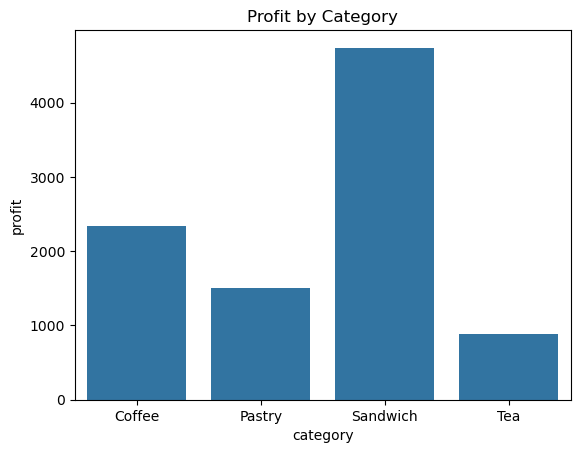

In [30]:
# Task 6: use sns.barplot() with aggregated data
plot_data = merged_data.groupby('category')['profit'].sum().reset_index()

sns.barplot(data= plot_data,x= 'category',y= 'profit')
plt.title("Profit by Category")

## Interpretation

Concisely answer the following questions based on your analysis.


1. What might go wrong if you did not verify the merge in Task 3 before proceeding with the analysis?
2. In Tasks 4 and 5, you aggregated data at different levels of detail (by category, then by category and location). How did this change what you could learn from the data?
3. Reflect on the patterns you discovered in your analysis. What valuable insights did your work generate?
4. The coffee shop owner asks: "Based on your analysis, what's the single most important thing I should do to improve profitability?" Provide a specific, actionable recommendation. Justify your recommendation with evidence from your analysis (include specific numbers from your results). Also, suggest additional analysis that you feel might be worthwhile.

### Your Answers

1. If the you do not verify a merge, it is possible that you could miss missing values that could have been added to the data. You could also accidentally merge on the wrong column or do the complete wrong type of merge, which will completely change your data. All of these reasons make verification after merging very important.
2. Looking just at category allows you to analyze how the products are doing compared against one another. By grouping with category and location, it alows you to compare how each product is doing at each location, providing more specific data for analysis.
3. To start, the data shows that sandwiches are by far the most profitable item, despite the fact that there are much more transactions involving coffee. Also, the data shows that coffee is most frequently bought downtown and on campus, which makes sense because people are there working. The mean profit is also consistently higher in downtown, which may indicate higher prices in that area.
4. Based on the data, items sold downtown have the highest average profit, but items sold downtown do not always have the highest total profit due to how often they are bought. This can be seen in the coffee category. Downtown easily has the the highest average profit, 3.06. Despite that, campus, which has the lowest average profit, has more total profit. This is because there are many more coffees being sold on campus than downtown. However, since average profit is higher across all categories downtown, even just a slight increase in transactions, which could come through marketing initiatives, could have a very big impact on total profit. In regard to additional data analysis, it would be good to look at types of pastry, coffee, sandwich, and tea that people are buying. Also, knowing what time they are being bought would be beneficial. 

## Bonus: Time-Based Analysis (Optional)

For extra credit, investigate a time-based question of your choosing. Examples of questions you could explore include:

- Do sales patterns differ between weekdays and weekends?
- Which hours are busiest at each location?
- Is there a day of the week that stands out for profitability?

For full credit you must:

- State your question clearly
- Show your analysis code
- Summarize what you found in 2-3 sentences

In [41]:
# Bonus: Your time-based analysis here
merged_data['hour'] = merged_data['timestamp'].dt.hour
frequencies = merged_data.groupby(['location','hour']).size()
print(frequencies)

location  hour
Campus    6        23
          7        67
          8       133
          9        90
          10       50
          11       73
          12      174
          13      150
          14       48
          15       37
          16       51
          17       65
          18       44
          19       32
          20       25
          21       12
Downtown  6        14
          7        68
          8       152
          9        85
          10       56
          11       56
          12      163
          13      132
          14       36
          15       29
          16       54
          17       71
          18       49
          19       33
          20       14
          21        9
Suburb    6        13
          7        43
          8        83
          9        66
          10       34
          11       48
          12       98
          13       87
          14       27
          15       20
          16       35
          17       41
          18     

### Your Findings

I chose to look at which hours were busiest at each location. My findings show that campus is busiest at 12, but also busy around 8 and 1. Similarly, downtown is busiest at 12, but it is almost nearly as busy at 8.The suburbs are also busiest at 12 and 1, but it stays much more consistent there with less quick rushes of customers.

## Submission

Ensure your notebook:

- Has the verification block (Banner ID and code) as the first cell
- Runs completely from top to bottom without errors
- Shows all task outputs clearly
- Includes all interpretation responses
- Is saved and committed to your repository

Follow the submission instructions on Canvas to submit your work.